In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
import pyforest
from skimpy import skim
from summarytools import dfSummary
import sweetviz as sv
import statsmodels.api as sm
#import dovpanda
import missingno as msno
import warnings
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error ,make_scorer
from sklearn.model_selection import GridSearchCV, KFold
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("EmployeeBurnout1.csv")

In [3]:
df.head(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,11/26/2008,Male,Product,Yes,2,4.0,3.6,0.29
6,fffe33003300340039003100,1/2/2008,Female,Service,No,3,6.0,7.9,0.62
7,fffe32003600320037003400,10/31/2008,Female,Service,Yes,2,4.0,4.4,0.33
8,fffe32003200300034003700,12/27/2008,Female,Service,No,3,6.0,NaN,0.56
9,fffe31003600320030003200,3/9/2008,Female,Product,No,3,6.0,NaN,0.67


In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 22750  │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name               ┃ NA     ┃ NA %   ┃ mean   ┃ sd   ┃ p0  ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Designation               │      0 │      0 │    2.2 │  1.1 │   0 │     1 │     2 │     3 │     5 │ ▂▅▇▆▃  │  │
│ │ Resource Allocation       │   1381 │   6.07 │    4.5 │    2 │   1 │     3 │     4 │     6 │    10 │ ▃▃▇▃▃▁ │  │
│ │ Mental Fatigue Score      │   2117 │   9.31 │    5.7 │  1.9 │   0 │   4.6 │   5.9 │   7.1 │    10 │ ▁▂▅▇▆▂ │  │
│ │ Burn Rate                 │   1124 │   4.94 │   0.45 │  0.2 │   0 │  0.31 │  0.45 │  0.59 │     1 │ ▂▅▇▇▃▁ │  │
│ └───────────────────────────┴────────┴────────┴────────┴──────┴─────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Employee ID                          │     0 │         0 │                        1 │                22750 │  │
│ │ Date of Joining                      │     0 │         0 │                        1 │                22750 │  │
│ │ Gender                               │     0 │         0 │                        1 │                22750 │  │
│ │ Company Type                         │     0 │         0 │                        1 │                22750 │  │
│ │ WFH Setup Available                  │     0 │         0 │                        1 │                22750 │  │
│ └──────────────────────────────────────┴───────┴───────────┴──────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<Axes: >

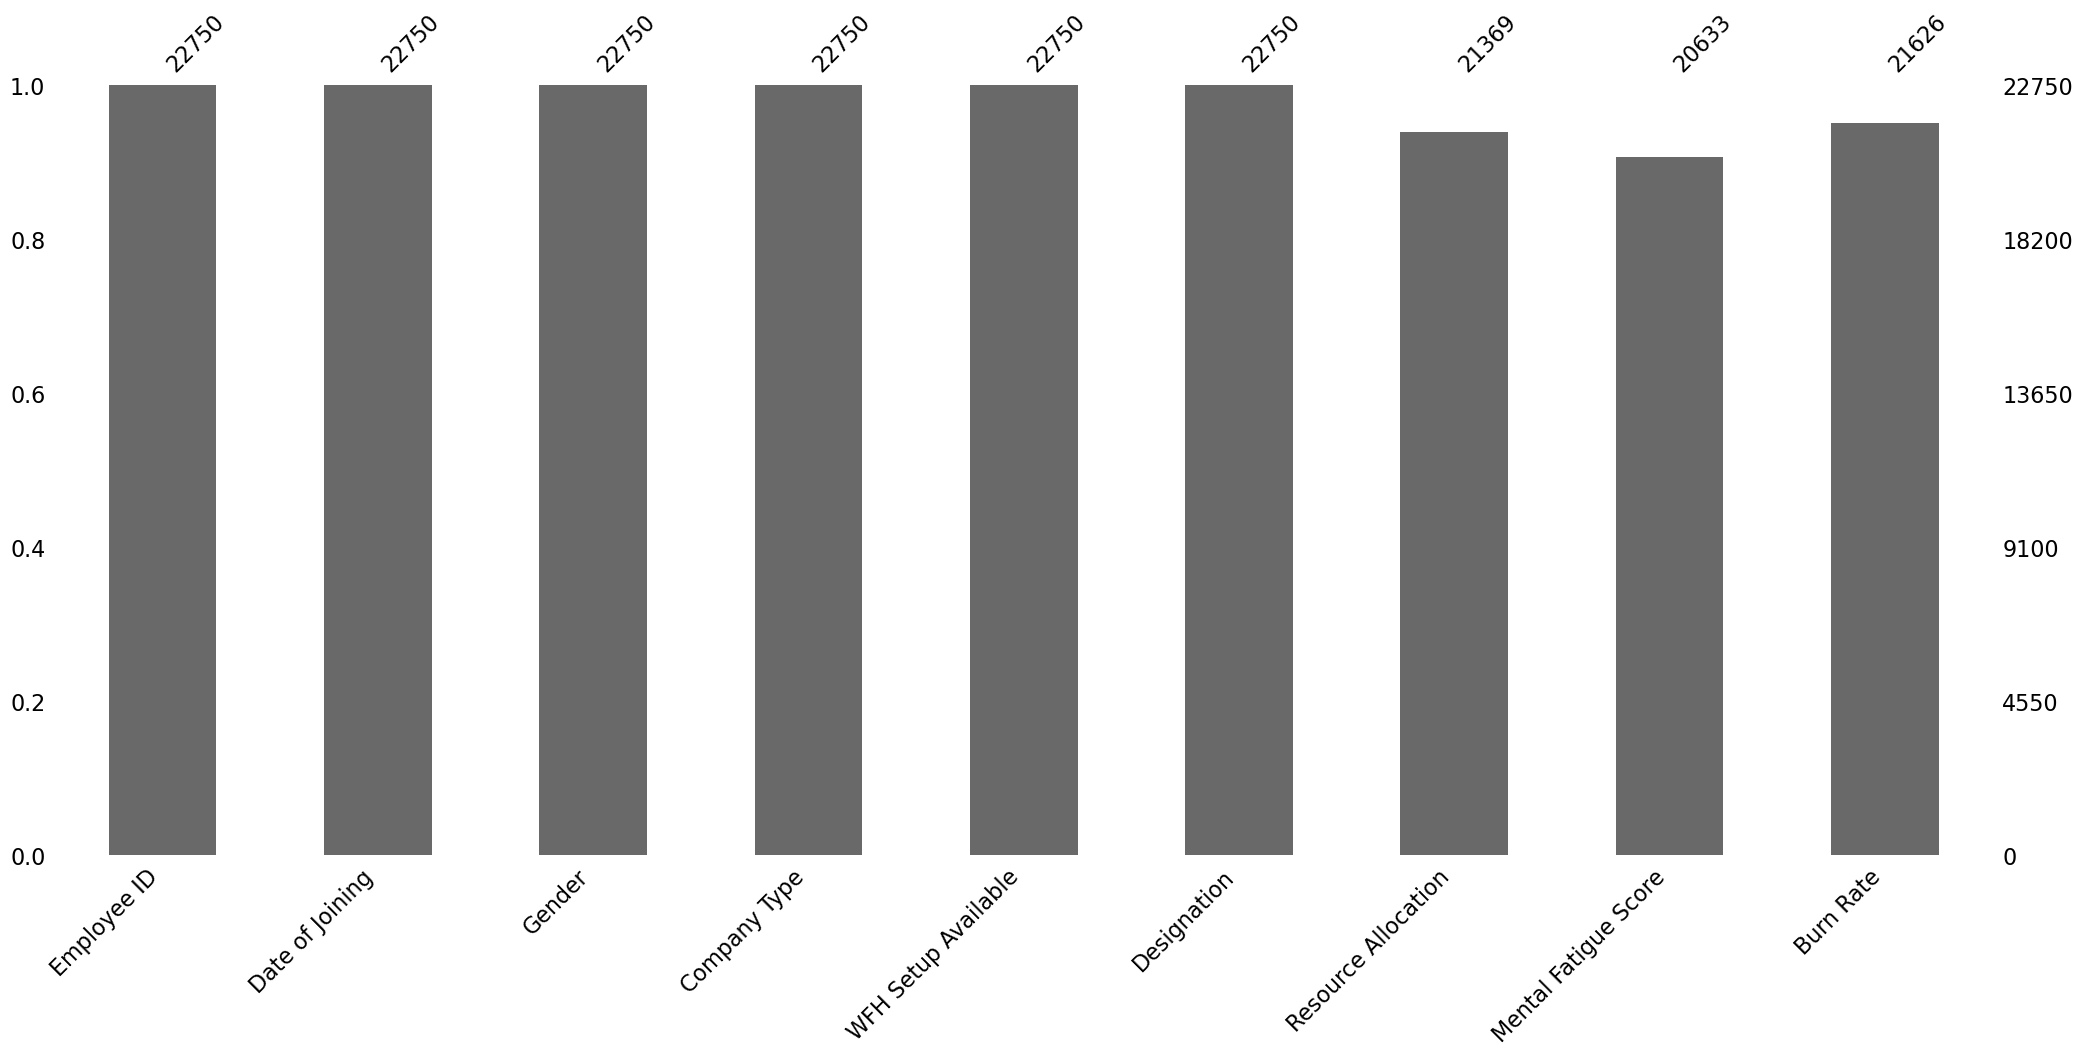

In [5]:
msno.bar(df)

In [6]:
df.dropna(inplace=True)

In [7]:
df.describe(include="all")

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,18590,18590,18590,18590,18590,18590.000000,18590.000000,18590.000000,18590.000000
unique,18590,366,2,2,2,NaN,NaN,NaN,NaN
top,fffe32003000360033003200,1/6/2008,Female,Service,Yes,NaN,NaN,NaN,NaN
freq,1,73,9747,12174,10030,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.179398,4.486552,5.732173,0.452444
std,NaN,NaN,NaN,NaN,NaN,1.133148,2.044848,1.920547,0.197848
min,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1.000000,3.000000,4.600000,0.320000
50%,NaN,NaN,NaN,NaN,NaN,2.000000,4.000000,5.900000,0.450000
75%,NaN,NaN,NaN,NaN,NaN,3.000000,6.000000,7.100000,0.590000


In [8]:
df.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           18590 non-null  object 
 1   Date of Joining       18590 non-null  object 
 2   Gender                18590 non-null  object 
 3   Company Type          18590 non-null  object 
 4   WFH Setup Available   18590 non-null  object 
 5   Designation           18590 non-null  int64  
 6   Resource Allocation   18590 non-null  float64
 7   Mental Fatigue Score  18590 non-null  float64
 8   Burn Rate             18590 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.4+ MB


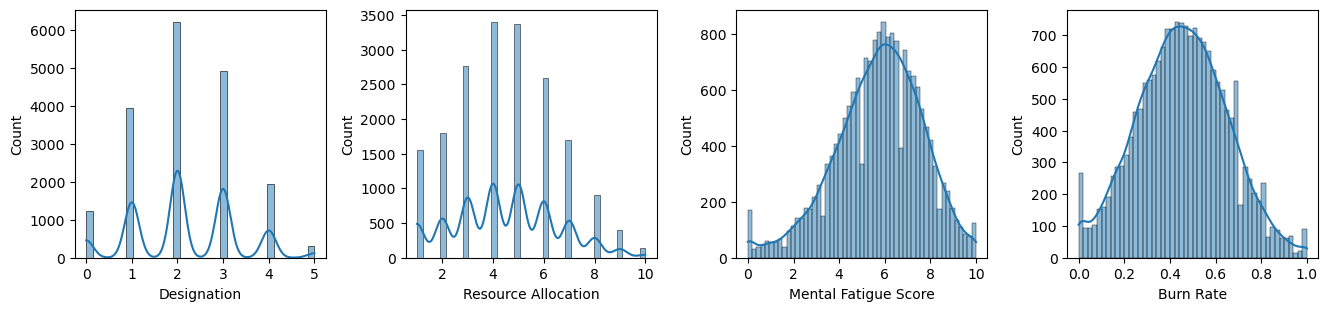

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
plotnumber = 1

for column in df.select_dtypes(include='number'):
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


                                             |                                             | [  0%]   00:00 ->…


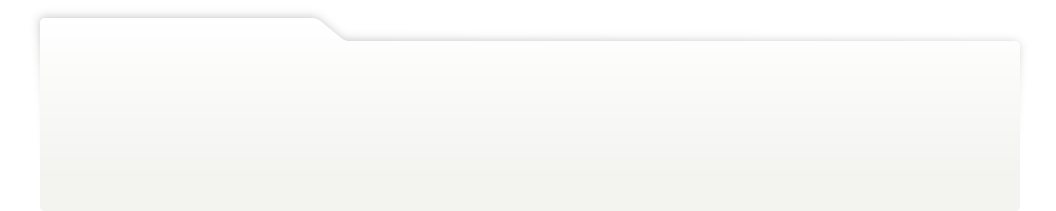
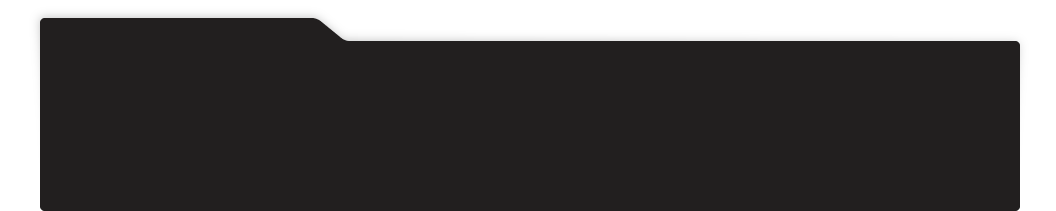
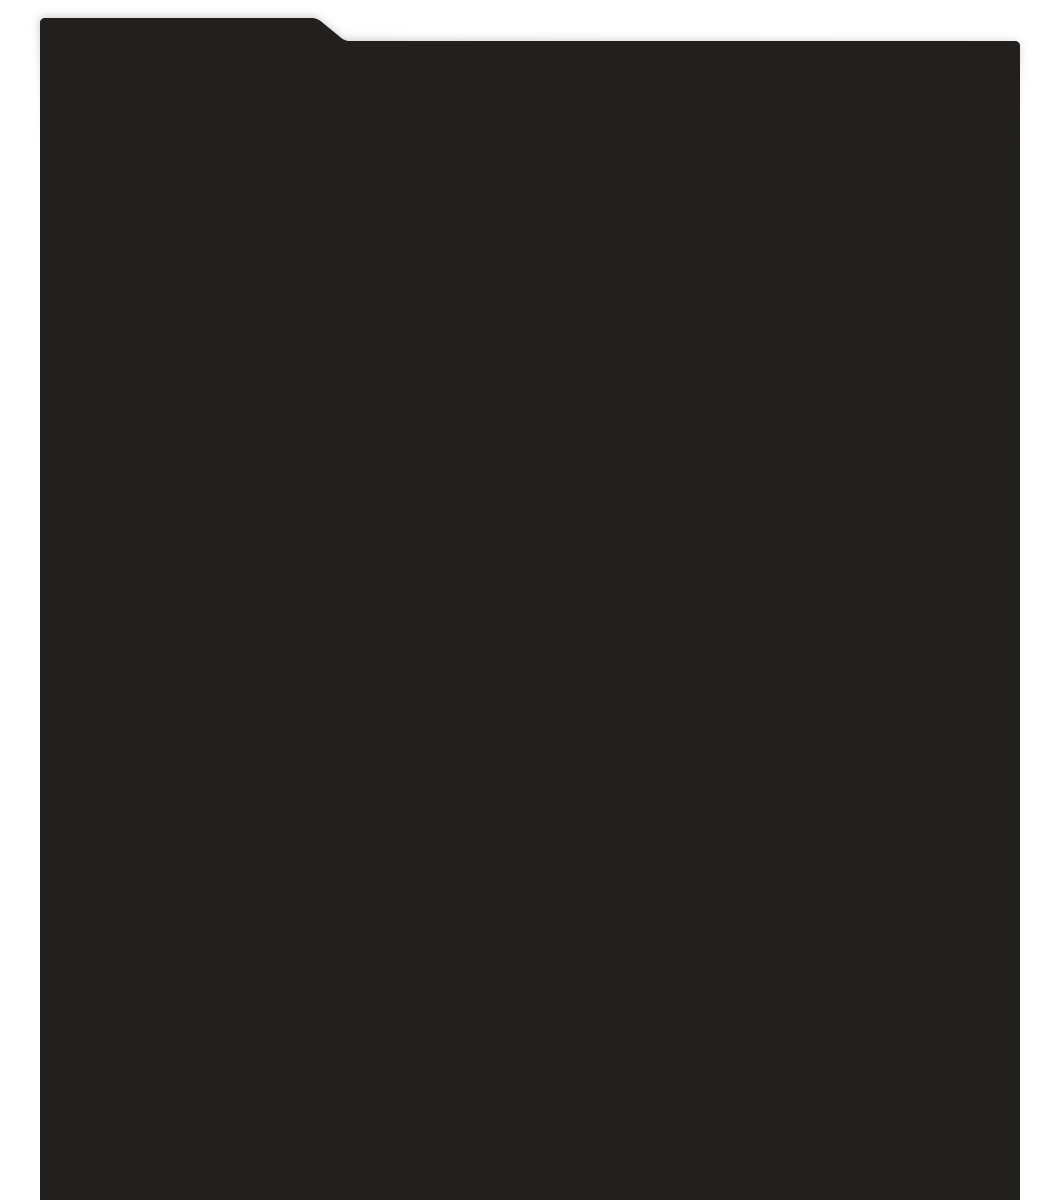
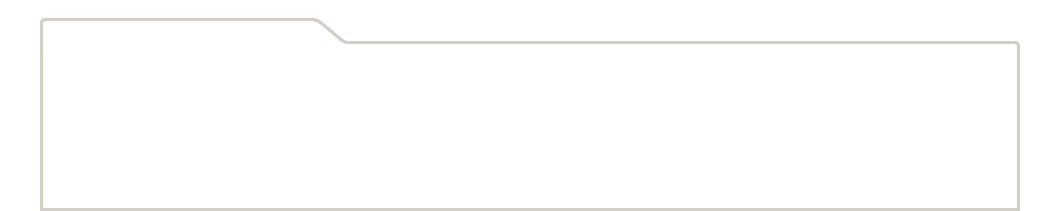
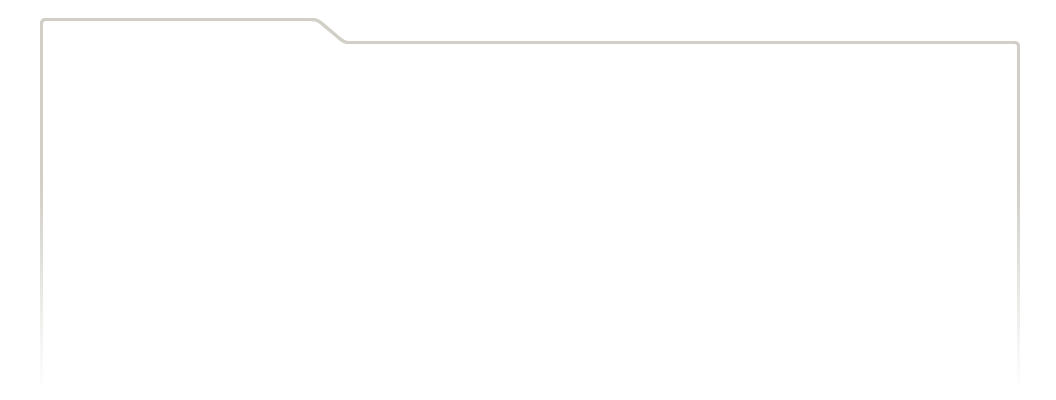
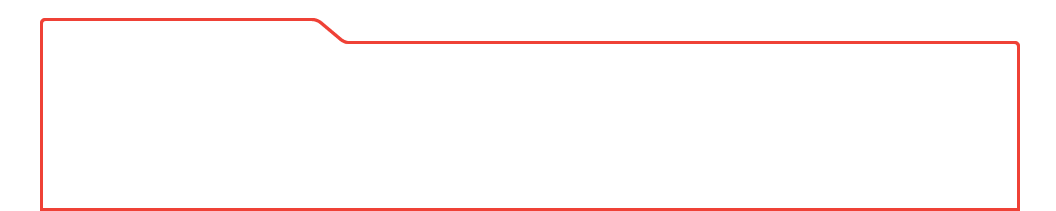
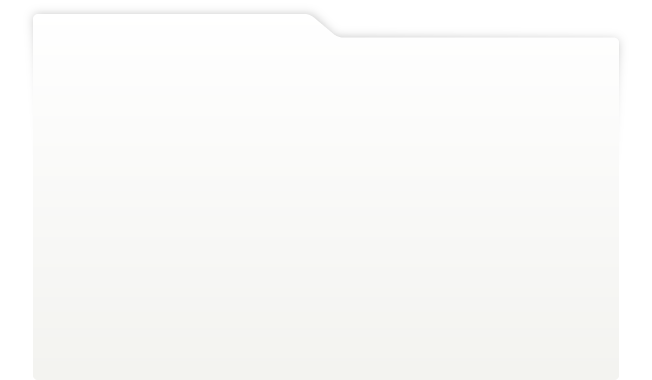
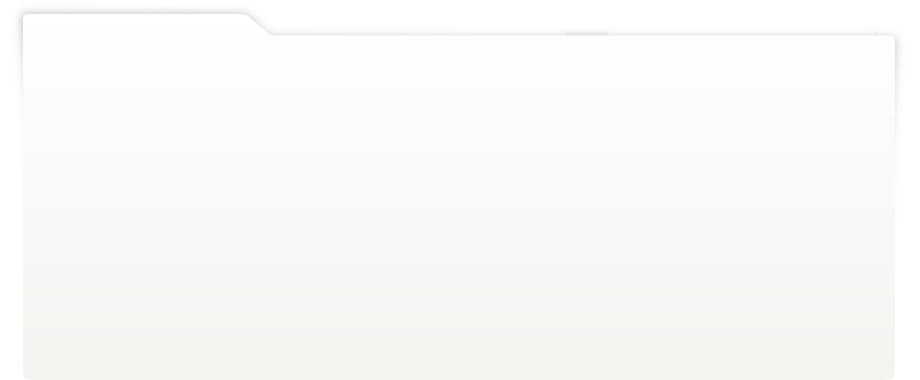
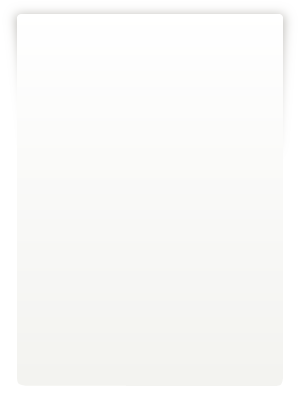
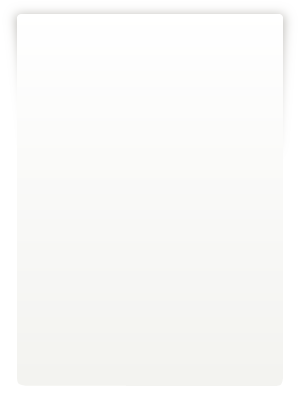
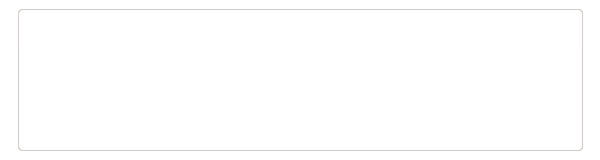
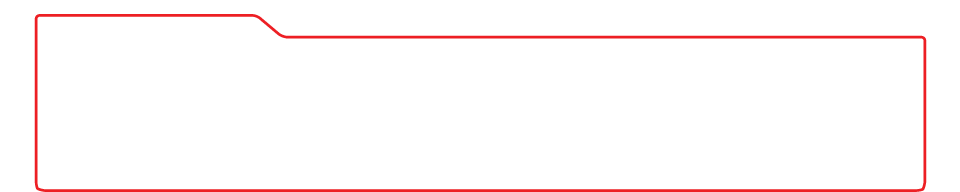
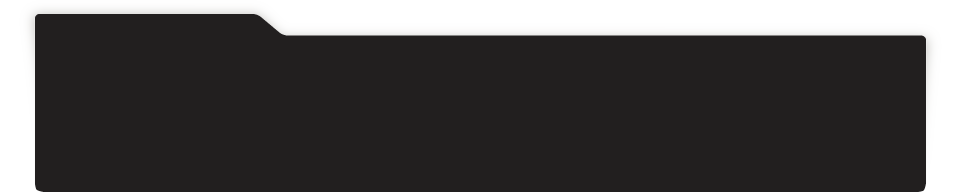
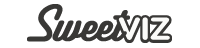
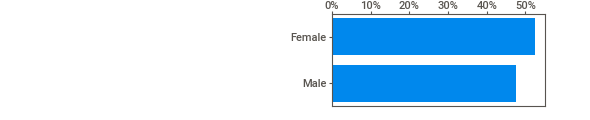
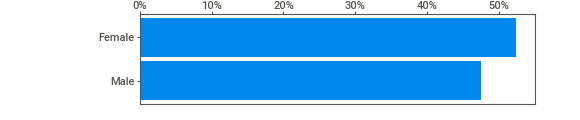
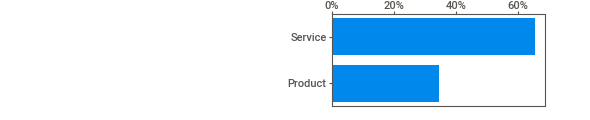
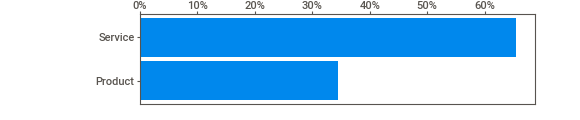
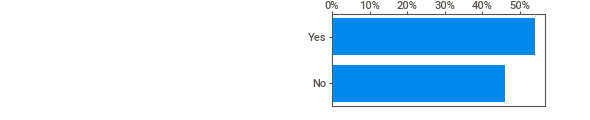
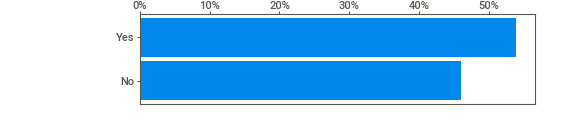
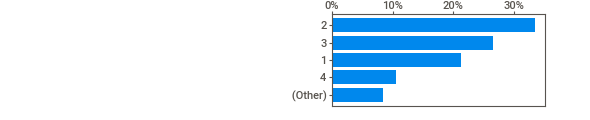
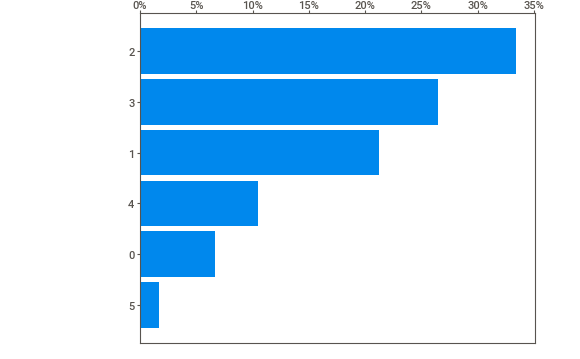
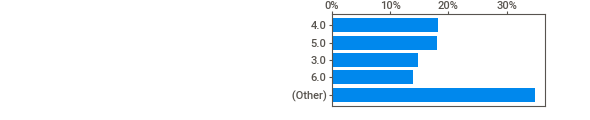
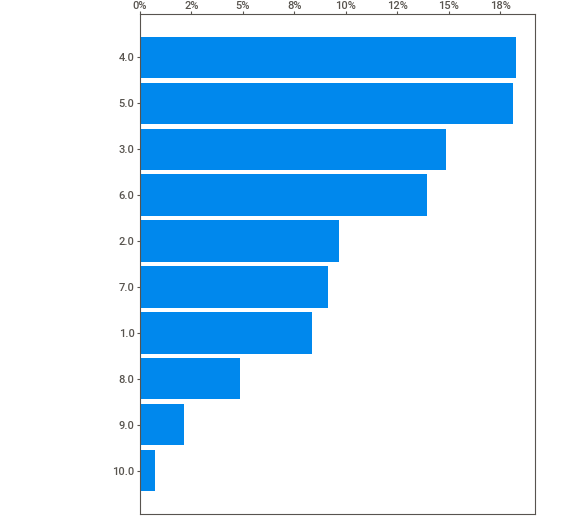
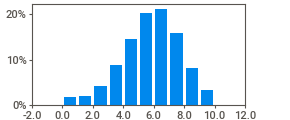
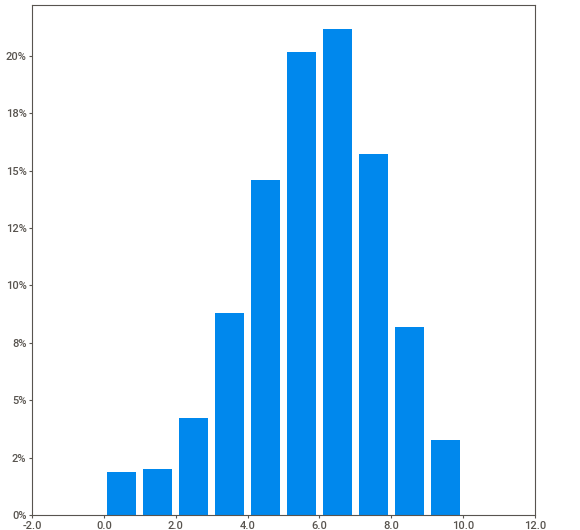
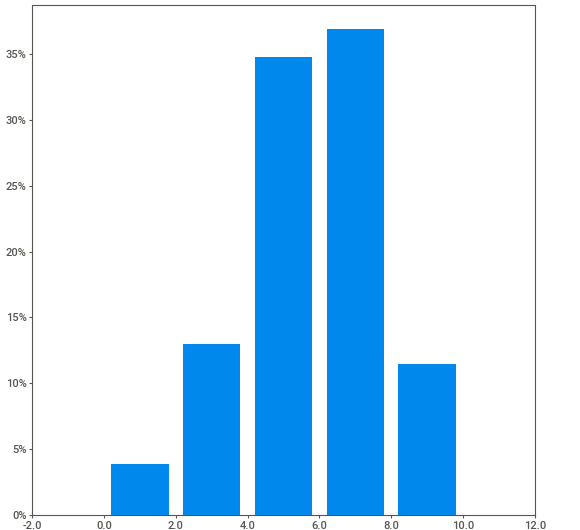
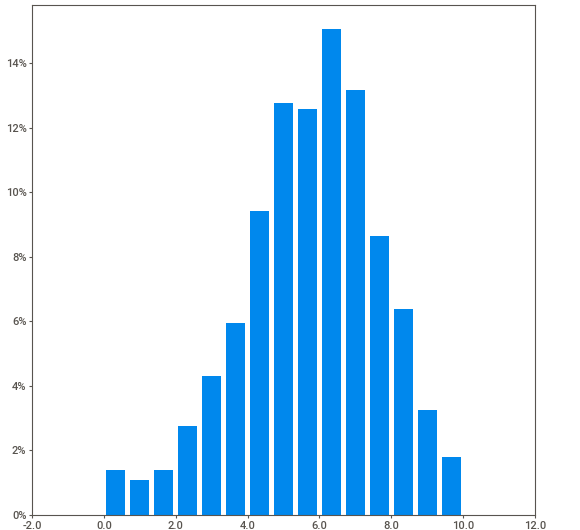
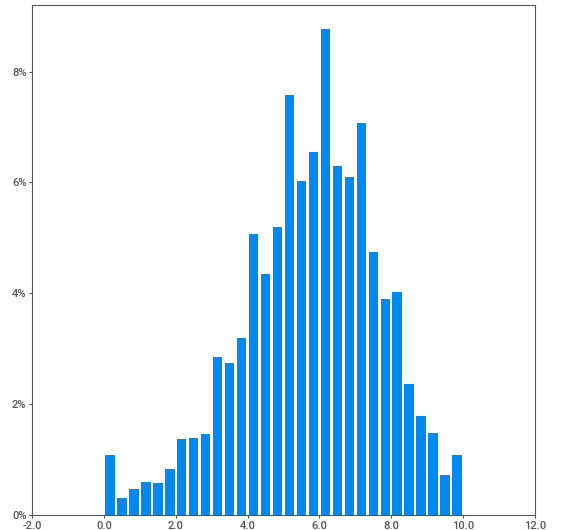
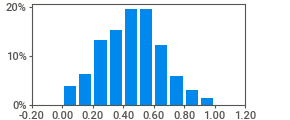
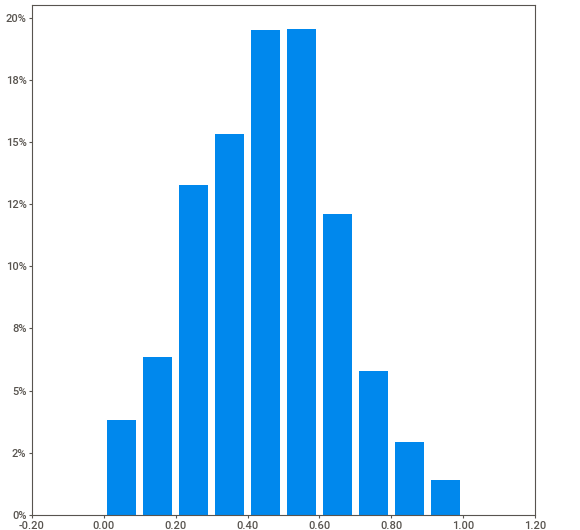
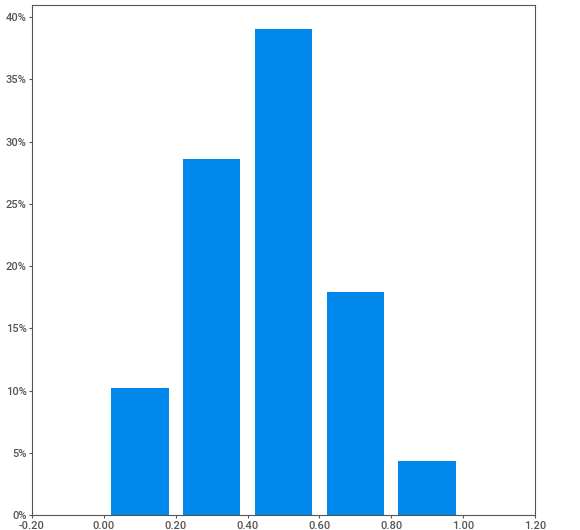
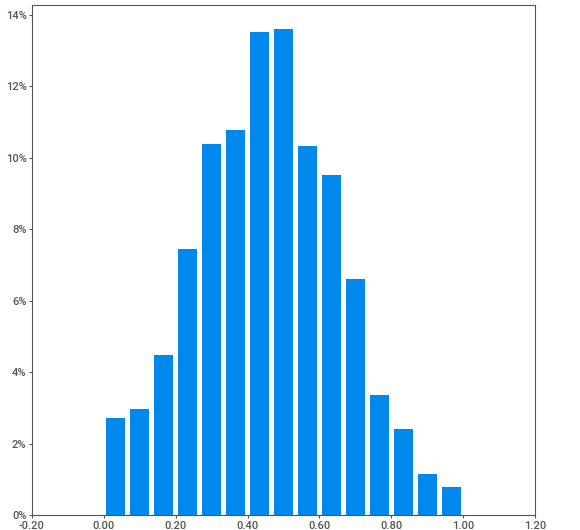
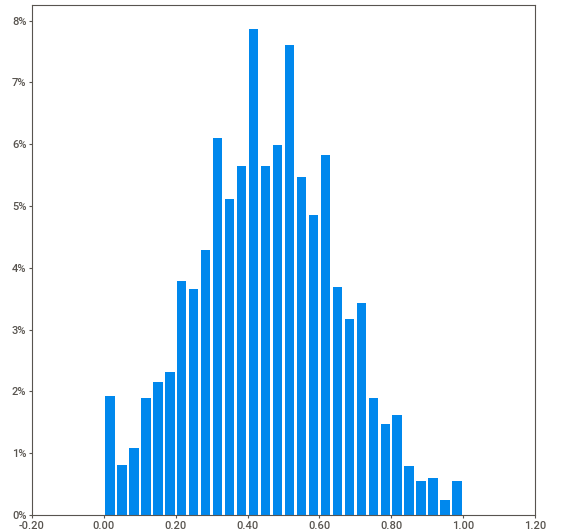
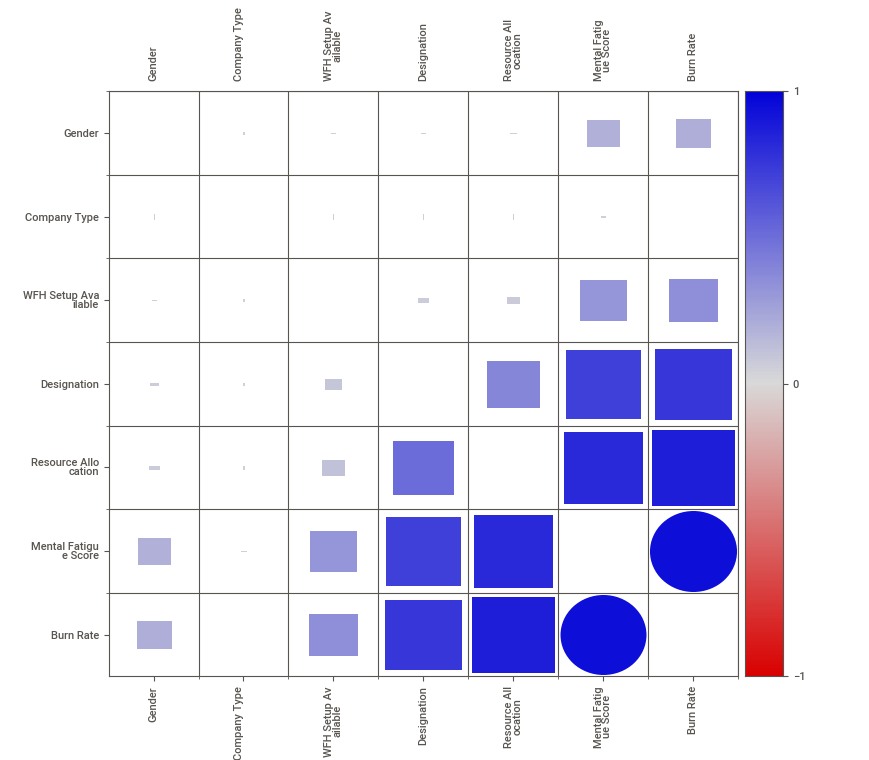
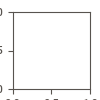

In [11]:
my_report = sv.analyze(df)
my_report.show_notebook()

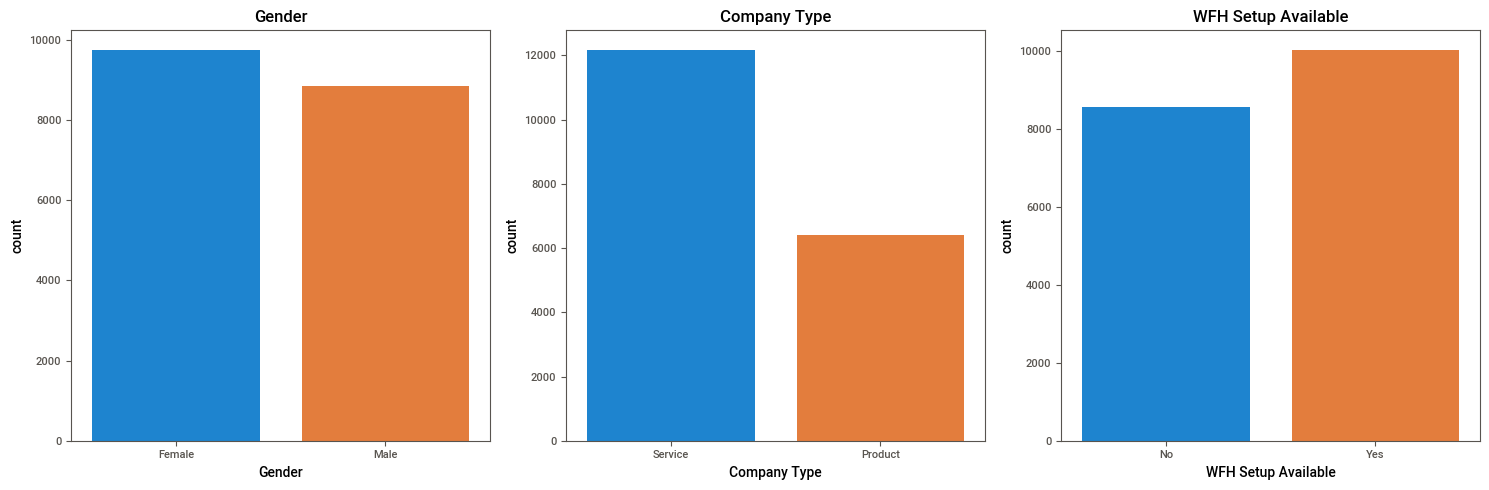

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Gender')
plt.title('Gender')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Company Type')
plt.title('Company Type')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='WFH Setup Available')
plt.title('WFH Setup Available')

plt.tight_layout()
plt.show()


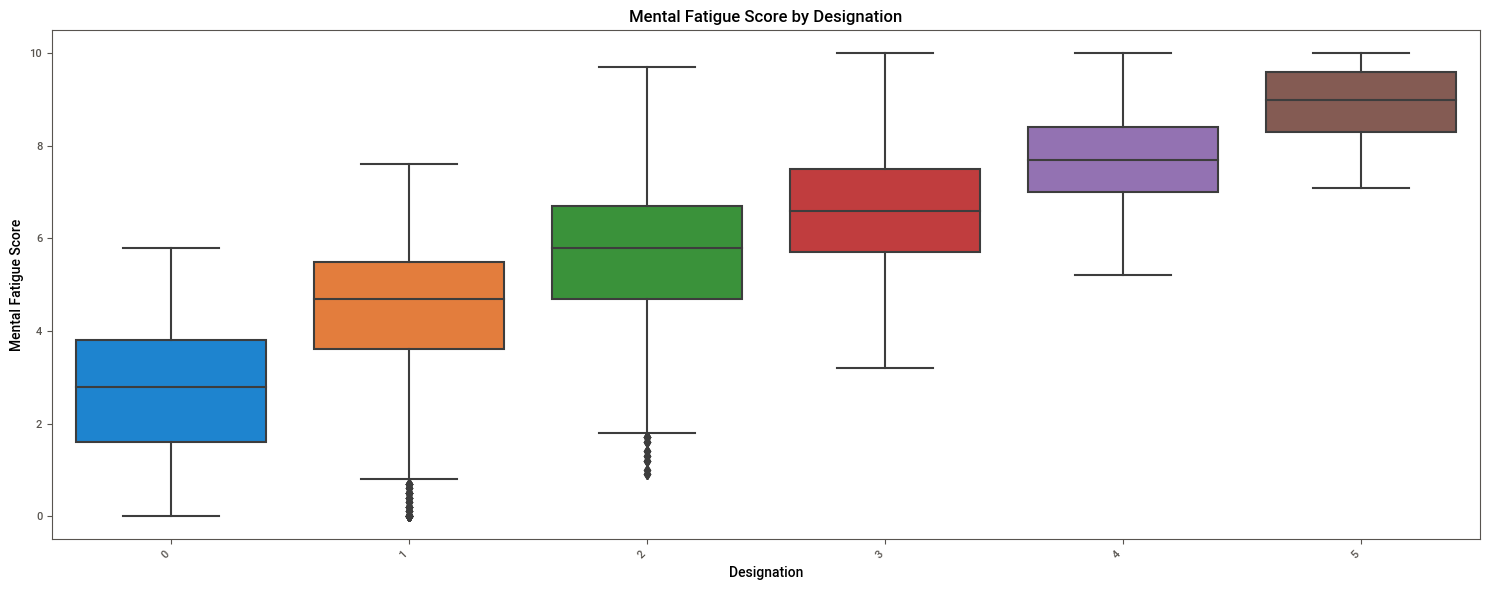

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

sns.boxplot(data=df, x='Designation', y='Mental Fatigue Score')
plt.title('Mental Fatigue Score by Designation')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


In [14]:
label_encoder = LabelEncoder()

# Label encode 'Gender' column
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Label encode 'Company Type' column
df['Company Type'] = label_encoder.fit_transform(df['Company Type'])

# Label encode 'WFH Setup Available' column
df['WFH Setup Available'] = label_encoder.fit_transform(df['WFH Setup Available'])


In [15]:
df.drop(["Employee ID", "Date of Joining"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

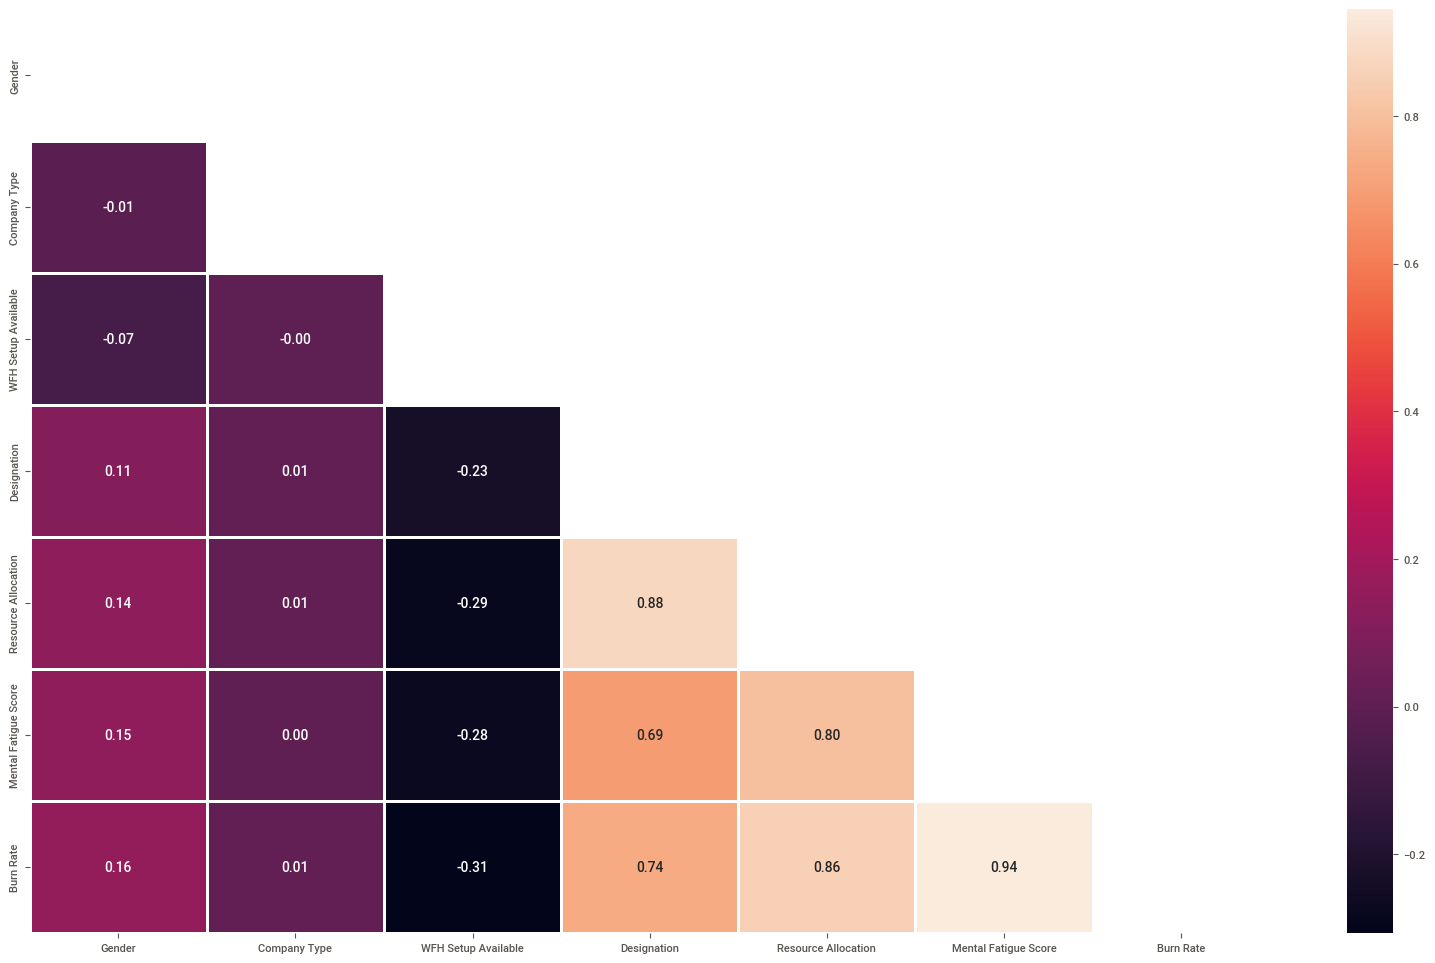

In [16]:
plt.figure(figsize=(20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [17]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]   


In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


<IPython.core.display.Javascript object>

In [19]:
model = LinearRegression()


<IPython.core.display.Javascript object>

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')
print(f'Mean absolute error: {mae}')

Mean Squared Error: 0.00311587117262752
R-squared Score: 0.920765848922243
Mean absolute error: 0.04564313752493975


In [23]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')
print(f'Mean absolute error: {mae}')

Mean Squared Error: 0.0030638579021906105
R-squared Score: 0.9202219777928837
Mean absolute error: 0.04552000543109635


In [24]:

# Define the parameter grid to search
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],  
}

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(mean_squared_error), cv=cv_strategy)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Use y_test for r2_score, not y_train

print(f'Best Parameters: {best_params}')
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')
print(f'Mean absolute error: {mae}')


Best Parameters: {'fit_intercept': False, 'positive': True}
Mean Squared Error: 0.0030638579021906105
R-squared Score: 0.9202219777928837
Mean absolute error: 0.04552000543109635
